#Get Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan


In [0]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
!echo "{\"username\":\"jonathangreenberg\",\"key\":\"6508f83fa2a527cf135ebd24c1bda215\"}" > kaggle.json

In [0]:
mkdir ~/.kaggle

In [0]:
!sudo cp /content/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle --version

Kaggle API 1.5.4


In [0]:
!kaggle datasets download -d ghopkins/nba-injuries-2010-2018

  0% 0.00/98.8k [00:00<?, ?B/s]
100% 98.8k/98.8k [00:00<00:00, 87.7MB/s]


In [0]:
train_df = pd.read_csv('/content/nba-injuries-2010-2018.zip', compression='zip', low_memory=False)

#EDA

In [0]:
train_df.tail(10)

,Date,Team,Acquired,Relinquished,Notes
11240,2020-03-06,Bulls,NaN,Ryan Arcidiacono,sore right Achilles (DTD)
11241,2020-03-06,Hawks,Cam Reddish,NaN,returned to lineup
11242,2020-03-06,Magic,NaN,Evan Fournier,sprained right elbow (DTD)
11243,2020-03-06,Mavericks,NaN,Dorian Finney-Smith,right hip injury (DTD)
11244,2020-03-06,Pacers,NaN,Doug McDermott,toe injury (DTD)
11245,2020-03-06,Pacers,NaN,Malcolm Brogdon,torn left quadriceps (out indefinitely)
11246,2020-03-06,Pelicans,NaN,Nickeil Alexander-Walker,fractured right wrist (out indefinitely)
11247,2020-03-06,Rockets,NaN,Eric Gordon,sore right knee (DTD)
11248,2020-03-06,Suns,NaN,Deandre Ayton,sprained left ankle (DTD)
11249,2020-03-07,Cavaliers,NaN,Dean Wade,sprained right ankle (DTD)


In [0]:
def f(row):
    if pd.isnull(row['Acquired']):
        val = 1
    else:
        val = 0
    return val

In [0]:
def player(row):
    if row['Benched'] == 0:
        val = row['Acquired']
    else:
        val = row['Relinquished']
    return val

In [0]:
# if acquired column is nan then make the benched column 1 and the player column equal to the relinquised column value
train_df['Benched'] = train_df.apply(f, axis=1)

In [0]:
train_df.tail()

,Date,Team,Acquired,Relinquished,Notes,Benched
11245,2020-03-06,Pacers,NaN,Malcolm Brogdon,torn left quadriceps (out indefinitely),1
11246,2020-03-06,Pelicans,NaN,Nickeil Alexander-Walker,fractured right wrist (out indefinitely),1
11247,2020-03-06,Rockets,NaN,Eric Gordon,sore right knee (DTD),1
11248,2020-03-06,Suns,NaN,Deandre Ayton,sprained left ankle (DTD),1
11249,2020-03-07,Cavaliers,NaN,Dean Wade,sprained right ankle (DTD),1


In [0]:
train_df['Benched'] = pd.to_numeric(train_df['Benched'])

In [0]:
train_df['Player'] = train_df.apply(player, axis=1)

In [0]:
# only include the row if it is about a player being benched due to an injury, not returning to the lineup
train_df = train_df[train_df.Benched != 0]

In [0]:
train_df = train_df.drop(columns=['Benched', 'Acquired', 'Relinquished'])

In [0]:
train_df.tail()

,Date,Team,Notes,Player
11245,2020-03-06,Pacers,torn left quadriceps (out indefinitely),Malcolm Brogdon
11246,2020-03-06,Pelicans,fractured right wrist (out indefinitely),Nickeil Alexander-Walker
11247,2020-03-06,Rockets,sore right knee (DTD),Eric Gordon
11248,2020-03-06,Suns,sprained left ankle (DTD),Deandre Ayton
11249,2020-03-07,Cavaliers,sprained right ankle (DTD),Dean Wade


In [0]:
train_df.shape

(9186, 4)

In [0]:
train_df.columns

Index(['Date', 'Team', 'Notes', 'Player'], dtype='object')

In [0]:
train_df.head()

,Date,Team,Notes,Player
0,2010-10-03,Bulls,fractured bone in right pinky finger (out inde...,Carlos Boozer
1,2010-10-06,Pistons,torn right Achilles tendon (out indefinitely),Jonas Jerebko
2,2010-10-06,Pistons,broken fifth metatarsal in right foot (out ind...,Terrico White
3,2010-10-08,Blazers,torn ACL in right knee (out indefinitely),Jeff Ayres
4,2010-10-08,Nets,strained lower back (out indefinitely),Troy Murphy


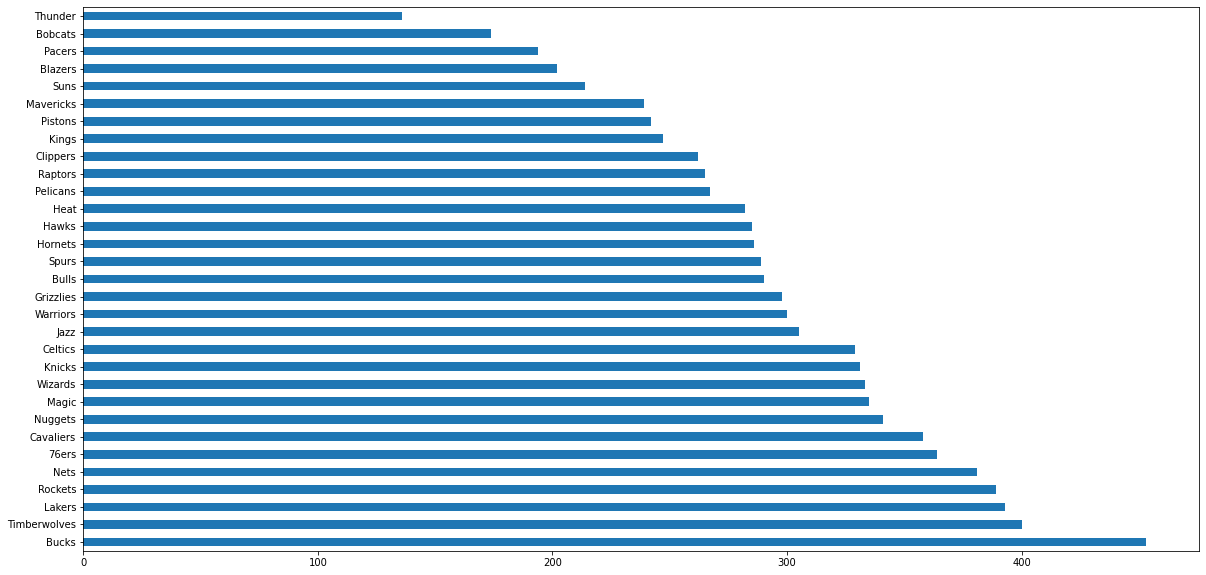

In [0]:
# teams with most injuries/logs
train_df.Team.value_counts().plot(kind='barh', figsize=(20,10))

In [0]:
# check out the most common words in the notes on the injuries
from collections import Counter
from string import punctuation

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

stoplist = set(stopwords.words('english') + list(punctuation))

texts = train_df['Notes'].str.lower()

word_counts = Counter(word_tokenize('\n'.join(texts)))

word_counts.most_common()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[(')', 9368),
 ('(', 9367),
 ('dnp', 4654),
 ('dtd', 3354),
 ('left', 3162),
 ('right', 3095),
 ('knee', 1807),
 ('sore', 1518),
 ('sprained', 1500),
 ('ankle', 1418),
 ('injury', 1207),
 ('out', 1121),
 ('strained', 1025),
 ('surgery', 657),
 ('back', 632),
 ('in', 616),
 ('indefinitely', 600),
 ('on', 563),
 ('foot', 530),
 ('for', 526),
 ('season', 517),
 ('bruised', 485),
 ('rest', 467),
 ('to', 448),
 ('torn', 445),
 ('hamstring', 429),
 ('repair', 380),
 ('illness', 366),
 ('shoulder', 345),
 ('fractured', 325),
 ('lower', 291),
 ('calf', 266),
 ('groin', 256),
 ('hip', 252),
 ('/', 221),
 ('from', 202),
 ('recovering', 201),
 ('spasms', 195),
 ('concussion', 181),
 ('achilles', 167),
 ('wrist', 161),
 ('tendon', 154),
 ('elbow', 141),
 ('hand', 138),
 ('toe', 135),
 ('tendinitis', 134),
 ('p', 126),
 ('thumb', 113),
 ('meniscus', 111),
 ('acl', 105),
 ('flu', 105),
 ('bone', 99),
 ('leg', 91),
 ('fracture', 88),
 ('thigh', 85),
 ('cbc', 81),
 ('finger', 80),
 ('quadriceps', 77),

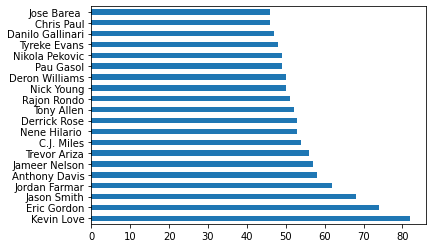

In [0]:
# players with most injuries/logs
train_df.Player.value_counts().sort_values(ascending=False)[:20].plot(kind='barh')

In [0]:
train_df.dtypes

Date      object
Team      object
Notes     object
Player    object
dtype: object

In [0]:
train_df['dateTime'] =  pd.to_datetime(train_df['Date'])

In [0]:
train_df.head()

,Date,Team,Notes,Player,dateTime
0,2010-10-03,Bulls,fractured bone in right pinky finger (out inde...,Carlos Boozer,2010-10-03
1,2010-10-06,Pistons,torn right Achilles tendon (out indefinitely),Jonas Jerebko,2010-10-06
2,2010-10-06,Pistons,broken fifth metatarsal in right foot (out ind...,Terrico White,2010-10-06
3,2010-10-08,Blazers,torn ACL in right knee (out indefinitely),Jeff Ayres,2010-10-08
4,2010-10-08,Nets,strained lower back (out indefinitely),Troy Murphy,2010-10-08


In [0]:
train_df.dtypes

Date                object
Team                object
Notes               object
Player              object
dateTime    datetime64[ns]
dtype: object

In [0]:
train_df['Year'] = train_df['dateTime'].dt.year

In [0]:
train_df.head(30)

,Date,Team,Notes,Player,dateTime,Year
0,2010-10-03,Bulls,fractured bone in right pinky finger (out inde...,Carlos Boozer,2010-10-03,2010
1,2010-10-06,Pistons,torn right Achilles tendon (out indefinitely),Jonas Jerebko,2010-10-06,2010
2,2010-10-06,Pistons,broken fifth metatarsal in right foot (out ind...,Terrico White,2010-10-06,2010
3,2010-10-08,Blazers,torn ACL in right knee (out indefinitely),Jeff Ayres,2010-10-08,2010
4,2010-10-08,Nets,strained lower back (out indefinitely),Troy Murphy,2010-10-08,2010
5,2010-10-08,Pistons,surgery to repair torn right Achilles tendon,Jonas Jerebko,2010-10-08,2010
6,2010-10-08,Pistons,surgery on right foot to repair broken fifth m...,Terrico White,2010-10-08,2010
7,2010-10-09,Nuggets,partially torn plantar fascia in left foot (ou...,Al Harrington,2010-10-09,2010
8,2010-10-12,Bucks,surgery on left hip (out for season),Darington Hobson,2010-10-12,2010
9,2010-10-12,Kings,strained left groin (out indefinitely),Samuel Dalembert,2010-10-12,2010


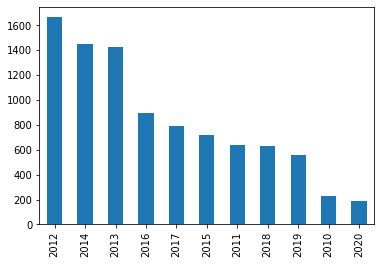

In [0]:
train_df['Year'].value_counts().plot(kind='bar', sort_columns = False)

In [0]:
#test out the word lemmatizer
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
answer = lemmatizer.lemmatize("feet")
print(answer)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
foot


In [0]:
#tried lemmatizing to see if there would be a difference, there isnt really a difference
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
texts = train_df['Notes'].str.lower()

tokens = word_tokenize('\n'.join(texts))

sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
        
clean_tokens[:] = [lemmatizer.lemmatize(token) for token in clean_tokens]

freq = nltk.FreqDist(clean_tokens)
freq.most_common(20)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(')', 9368),
 ('(', 9367),
 ('dnp', 4654),
 ('dtd', 3354),
 ('left', 3162),
 ('right', 3095),
 ('knee', 1822),
 ('sore', 1518),
 ('sprained', 1500),
 ('ankle', 1418),
 ('injury', 1209),
 ('strained', 1025),
 ('surgery', 657),
 ('back', 632),
 ('indefinitely', 600),
 ('foot', 530),
 ('season', 517),
 ('bruised', 485),
 ('rest', 467),
 ('torn', 445)]

Creating more features from the "notes" column

In [0]:
#now to create more features!
# get a list of body parts and take the body part out and into a diff column
# take the injury out and put that into the injury column
# take the severity out/time out for-DTD, or indefinitely, or 
# also account for adjectives, like partially, or loose, or middle, 
# also look for verbs
# split as part of speech, verbs, nouns, adjectives,

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9186 entries, 0 to 11249
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9186 non-null   object        
 1   Team      9184 non-null   object        
 2   Notes     9186 non-null   object        
 3   Player    9186 non-null   object        
 4   dateTime  9186 non-null   datetime64[ns]
 5   Year      9186 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 502.4+ KB


In [0]:
train_df.tail(10)

,Date,Team,Notes,Player,dateTime,Year
11239,2020-03-06,Bucks,sprained left ankle (DTD),D.J. Wilson,2020-03-06,2020
11240,2020-03-06,Bulls,sore right Achilles (DTD),Ryan Arcidiacono,2020-03-06,2020
11242,2020-03-06,Magic,sprained right elbow (DTD),Evan Fournier,2020-03-06,2020
11243,2020-03-06,Mavericks,right hip injury (DTD),Dorian Finney-Smith,2020-03-06,2020
11244,2020-03-06,Pacers,toe injury (DTD),Doug McDermott,2020-03-06,2020
11245,2020-03-06,Pacers,torn left quadriceps (out indefinitely),Malcolm Brogdon,2020-03-06,2020
11246,2020-03-06,Pelicans,fractured right wrist (out indefinitely),Nickeil Alexander-Walker,2020-03-06,2020
11247,2020-03-06,Rockets,sore right knee (DTD),Eric Gordon,2020-03-06,2020
11248,2020-03-06,Suns,sprained left ankle (DTD),Deandre Ayton,2020-03-06,2020
11249,2020-03-07,Cavaliers,sprained right ankle (DTD),Dean Wade,2020-03-07,2020


In [0]:
train_df.isnull().sum()

Date        0
Team        2
Notes       0
Player      0
dateTime    0
Year        0
dtype: int64

In [0]:
train_df[train_df['Team'].isna()]

,Date,Team,Notes,Player,dateTime,Year
6331,2015-09-02,NaN,surgery on left ankle to repair torn ligaments...,Glen Davis,2015-09-02,2015
6333,2015-09-03,NaN,surgery on hip to repair torn labrum (out inde...,Landry Fields,2015-09-03,2015


In [0]:
# need to tokenize each row's notes, and then determine if each token is in bodyparts, then put it in the bodypart column, 
# if its in the severity, or injurytype word bag, then put it in the 
# severity type column, figure out the best way to do this
# maybe do some unsupervised learning for NLP on the notes, see which words are most related to each other, which words grouped together more often, patterns with clustering
# create a column of all the words in each row tokenized, then i can iterate thru each rows tokenized words 
# and decide where to put all of those words, in diff collumns, so each row should have each column filled, body part, injury type, severity

In [0]:
# first tokenize each row's notes and put into a new column called tokenized notes
#tried lemmatizing to see if there would be a difference, there isnt really a difference
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

train_df['Tokenized Notes'] = train_df.apply (lambda row: word_tokenize(row['Notes'].lower()), axis=1)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
train_df.head()

,Date,Team,Notes,Player,dateTime,Year,Tokenized Notes
0,2010-10-03,Bulls,fractured bone in right pinky finger (out inde...,Carlos Boozer,2010-10-03,2010,"[fractured, bone, in, right, pinky, finger, (,..."
1,2010-10-06,Pistons,torn right Achilles tendon (out indefinitely),Jonas Jerebko,2010-10-06,2010,"[torn, right, achilles, tendon, (, out, indefi..."
2,2010-10-06,Pistons,broken fifth metatarsal in right foot (out ind...,Terrico White,2010-10-06,2010,"[broken, fifth, metatarsal, in, right, foot, (..."
3,2010-10-08,Blazers,torn ACL in right knee (out indefinitely),Jeff Ayres,2010-10-08,2010,"[torn, acl, in, right, knee, (, out, indefinit..."
4,2010-10-08,Nets,strained lower back (out indefinitely),Troy Murphy,2010-10-08,2010,"[strained, lower, back, (, out, indefinitely, )]"


In [0]:
# create a corpus of words that should go in each category/column'
# body parts
body  = "leg foot metatarsal fifth finger pinky ribs bone foot knee adductor acl shin back nerve ligament labrum elbow plantar achilles tendon hand head sinus thumb ankle hamstring wrist stomach midfoot arm joint tooth hip groin skin blood tonsils lungs left right toenail eyelid collarbone gluteus oral jaw toe heart patella shoulder calf chest eye triceps oblique mouth pelvis ear tissue nose hamstring quadriceps meniscus flexor rib abdomen forearm"
injury_type = "mononucleosis fractured arthroscopic hernia turf bruise illness surgery partially sore sprained strained rest dislocated inflammation bruised fasciitis hyperextended spasms concussion tendinitis flu fracture stress infection virus tightness herniated torn soreness cold pain dizziness injury bonchitis laceration fatigue stiffness clots abrasion upset splits fragment microfracture contusion irritation broken swelling ailment headache "
severity = "dtd season indefinitely rest dnp"
#remove these injury logs bc they dont relate to gameplay or resting
take_out_these_players = "illness flu-like symptoms bronchitis"
body = body.split()
injury_type = injury_type.split()
severity = severity.split()

In [0]:
#check if each rows tokenized words are in body, if it is, then put it in the body column

In [0]:
def bodetize(tokens):
  bodies = []
  for x in tokens:
    if x in body:
      bodies.append(x)
  return bodies

def severetize(tokens):
  severities = []
  for x in tokens:
    if x in severity:
      severities.append(x)
  return severities
  
def injury(tokens):
  injuries = []
  for x in tokens:
    if x in injury_type:
      injuries.append(x)
  return injuries

In [0]:
# create function put_body where it looks thru the tokenized notes column and returns an array of body parts for that row
train_df["Body"] = train_df.apply(lambda row: bodetize(row['Tokenized Notes']), axis=1)
train_df["Injury"] = train_df.apply(lambda row: injury(row['Tokenized Notes']), axis=1)
train_df["Severity"] = train_df.apply(lambda row: severetize(row['Tokenized Notes']), axis=1)

In [0]:
train_df.dtypes

Date                       object
Team                       object
Notes                      object
Player                     object
dateTime           datetime64[ns]
Year                        int64
Tokenized Notes            object
Body                       object
Injury                     object
Severity                   object
dtype: object

In [0]:
train_df.iloc[18]["Tokenized Notes"]

['sprained', 'right', 'ankle', '(', 'dnp', ')']

In [0]:
train_df.iloc[2050:2100]
      

,Date,Team,Notes,Player,dateTime,Year,Tokenized Notes,Body,Injury,Severity
2075,2012-04-23,Nets,sore right calf (DNP),Deron Williams,2012-04-23,2012,"[sore, right, calf, (, dnp, )]","[right, calf]",[sore],[dnp]
2076,2012-04-23,Nets,sore right groin (DNP),Jordan Farmar,2012-04-23,2012,"[sore, right, groin, (, dnp, )]","[right, groin]",[sore],[dnp]
2077,2012-04-23,Nets,hyperextended right knee (DNP),Shelden Williams,2012-04-23,2012,"[hyperextended, right, knee, (, dnp, )]","[right, knee]",[hyperextended],[dnp]
2078,2012-04-23,Pacers,sore left shoulder (DNP),George Hill,2012-04-23,2012,"[sore, left, shoulder, (, dnp, )]","[left, shoulder]",[sore],[dnp]
2079,2012-04-23,Pacers,rest (DNP),Roy Hibbert,2012-04-23,2012,"[rest, (, dnp, )]",[],[rest],"[rest, dnp]"
2080,2012-04-23,Raptors,right eye injury (DNP),Jose Calderon,2012-04-23,2012,"[right, eye, injury, (, dnp, )]","[right, eye]",[injury],[dnp]
2081,2012-04-23,Wizards,plantar fasciitis in left foot (DNP),Trevor Booker,2012-04-23,2012,"[plantar, fasciitis, in, left, foot, (, dnp, )]","[plantar, left, foot]",[fasciitis],[dnp]
2082,2012-04-24,Celtics,sore right foot (DNP),Greg Stiemsma,2012-04-24,2012,"[sore, right, foot, (, dnp, )]","[right, foot]",[sore],[dnp]
2083,2012-04-24,Celtics,hip flexor injury (DNP),Kevin Garnett,2012-04-24,2012,"[hip, flexor, injury, (, dnp, )]","[hip, flexor]",[injury],[dnp]
2084,2012-04-24,Celtics,sore lower back (DNP),Rajon Rondo,2012-04-24,2012,"[sore, lower, back, (, dnp, )]",[back],[sore],[dnp]


#Getting NBA Game Stats

In [0]:
!pip install basketball_reference_web_scraper

In [0]:
from basketball_reference_web_scraper import client
from basketball_reference_web_scraper.data import OutputType
'''
Check the previous 10 days before the injury, not including the game with the injury, so not the game right before the date
Rather 2 games ago to 5 games ago, was there a significant telltale sign of injnury? Did something change in the minutes plays
or in the efficiency usage?
Look for advanced game log statistics
Think about how to best populate these columns, 
How can i get all the data for each player effectively retrieving from basketballreferencescraper
what metrics should i use in each column
how can i test the model
train/test split  70/30 and predict what types of injuries people will get?
 Predict if a player will get an injury? How can i do that if there are only players with injuries here
 maybe train also on a list of healthy players and test against a mixture of them and see if i can predict which will get injnured

either get each plays identifier

or get all players stats for the last 10 seasons 
 '''

# Get all results that match "Ko"
# client.search(term="Ko")
from basketball_reference_web_scraper import client

# https://www.basketball-reference.com/players/k/kamanch01/gamelog/2011

# Get regular season box scores for Russell Westbrook for the 2018-2019 season
plyr = client.regular_season_player_box_scores(
    player_identifier="kamanch01",
    season_end_year=2011,
)
print("Date: " + str(plyr[0]['date']))
print(plyr[0])

#include non - injured players rows, 10 days/10 games of statistics and have a classification bonary column is_injured
# also clsuter the injuries via types
# and cluster with statistics pre-injury
# The search method supports all output behavior previously described



Date: 2010-10-27
{'date': datetime.date(2010, 10, 27), 'team': <Team.LOS_ANGELES_CLIPPERS: 'LOS ANGELES CLIPPERS'>, 'location': <Location.HOME: 'HOME'>, 'opponent': <Team.PORTLAND_TRAIL_BLAZERS: 'PORTLAND TRAIL BLAZERS'>, 'outcome': <Outcome.LOSS: 'LOSS'>, 'seconds_played': 2142, 'made_field_goals': 4, 'attempted_field_goals': 18, 'made_three_point_field_goals': 0, 'attempted_three_point_field_goals': 0, 'made_free_throws': 0, 'attempted_free_throws': 1, 'offensive_rebounds': 3, 'defensive_rebounds': 8, 'assists': 1, 'steals': 2, 'blocks': 1, 'turnovers': 2, 'personal_fouls': 1, 'points_scored': 8, 'game_score': 2.1, 'plus_minus': -15}


In [0]:
#How to iterate thru a time span, 10 days prior to injury
import datetime
from datetime import timedelta
#iterate thru every date in the dataset
start_date = datetime.datetime(2010, 10, 3)
end_date = datetime.datetime(2020, 3, 7)
delta = timedelta(days=1)
while start_date <= end_date:
    print (start_date.strftime("%Y-%m-%d"))
    # print(start_date.day) # to get the day
    start_date += delta

2010-10-03
2010-10-04
2010-10-05
2010-10-06
2010-10-07
2010-10-08
2010-10-09
2010-10-10
2010-10-11
2010-10-12
2010-10-13
2010-10-14
2010-10-15
2010-10-16
2010-10-17
2010-10-18
2010-10-19
2010-10-20
2010-10-21
2010-10-22
2010-10-23
2010-10-24
2010-10-25
2010-10-26
2010-10-27
2010-10-28
2010-10-29
2010-10-30
2010-10-31
2010-11-01
2010-11-02
2010-11-03
2010-11-04
2010-11-05
2010-11-06
2010-11-07
2010-11-08
2010-11-09
2010-11-10
2010-11-11
2010-11-12
2010-11-13
2010-11-14
2010-11-15
2010-11-16
2010-11-17
2010-11-18
2010-11-19
2010-11-20
2010-11-21
2010-11-22
2010-11-23
2010-11-24
2010-11-25
2010-11-26
2010-11-27
2010-11-28
2010-11-29
2010-11-30
2010-12-01
2010-12-02
2010-12-03
2010-12-04
2010-12-05
2010-12-06
2010-12-07
2010-12-08
2010-12-09
2010-12-10
2010-12-11
2010-12-12
2010-12-13
2010-12-14
2010-12-15
2010-12-16
2010-12-17
2010-12-18
2010-12-19
2010-12-20
2010-12-21
2010-12-22
2010-12-23
2010-12-24
2010-12-25
2010-12-26
2010-12-27
2010-12-28
2010-12-29
2010-12-30
2010-12-31
2011-01-01

In [0]:
import datetime
#to match the date in my df with the date that i get from basketball reference web scraper
start_date = datetime.datetime(2010, 10, 3)  #so first comes the month, then the day
for index, row in train_df.iterrows():
  if row['dateTime'] == start_date:
    print(start_date.day)
    print(row['Player'])

3
Carlos Boozer


In [0]:
# from basketball_reference_web_scraper import client
# this_day = 3
# this_month = 10
# this_year = 2010

# players = client.player_box_scores(day=this_day, month=this_month, year=this_year)
# date = datetime.datetime(this_year, this_month, this_day) 
# # iterate thru every date of every month of the year
# for x in players:
#   for index, row in train_df.iterrows():
#     if x['name'] == row['Player']:
#       if date < row['dateTime']: #here is where i get a time frame of 10 days prior to the injury maybe
#         print(x['name'])

In [0]:
#found a way to retrieve the player identifier
players = client.player_box_scores(day=1, month=1, year=2017)
print(players[1]['slug']) # prints out the identifier for cj mccolumn
# found a way to get the player identifiers!
# the 'slug' when you search for a player gets the identifier for that player in the first thing

mccolcj01


In [0]:
#populate every row with a column called "identifier" and then use that to get all the stats i need
# maybe go thru a bunch of days each season and get all the players, and then check for nulls and fill them in manually
#some version of this function
def get_identifier(players): #players 
  for x in players:
    for index, row in train_df.iterrows():
      if x['name'] == row['Player']:
        if row['Player_Identifier'] == '':
          train_df.at[index , 'Player_Identifier'] = x['slug']
          #train_df['Player_Identifier'] = x['slug'] # this changes every single row in the df, i only want that row
          print(x['slug'])


In [0]:
# from basketball_reference_web_scraper import client
# #this takes a while to run
# this_day = 3
# this_month = 11
# this_year = 2010

# players = client.player_box_scores(day=this_day, month=this_month, year=this_year)
# # first clear the column
# train_df['Player_Identifier'] = ''
# get_identifier(players)
# this_day = 3
# this_month = 11
# this_year = 2012

# players = client.player_box_scores(day=this_day, month=this_month, year=this_year)
# get_identifier(players)

In [0]:
# this_day = 27
# this_month = 2
# this_year = 2015
# for i in range(2011, 2021): 
#   for x in range(20, 22): 
#     print('Year: ' + str(i))
#     print('Day: ' + str(x))
#     players = client.player_box_scores(day=x, month=this_month, year=i)
#     get_identifier(players)

In [0]:
# # for manual input for an identifier
# theName = 'Jose Calderon'
# for index, row in train_df.iterrows():
#     if row['Player'] == theName:
#       if row['Player_Identifier'] == '':
#         train_df.at[index , 'Player_Identifier'] = 'caldejo01'

In [0]:
train_df.head(50)

In [0]:
#How many player identifiers am i missing?
(train_df['Player_Identifier'].isnull()).sum()  

In [0]:
full_df = train_df[train_df['Player_Identifier'].notnull()]

In [0]:
len(full_df)

In [0]:
#df that isnt missing any player identifiers
full_df.head(30)

In [0]:
empty_df = train_df.loc[train_df['Player_Identifier'].isnull()]

In [0]:
#maybe iterate thru this to get more identifiers...
len(empty_df)

In [0]:
this_day = 27
this_month = 3
this_year = 2015
for i in range(2011, 2021): 
  for x in range(10, 25): 
    print('Year: ' + str(i))
    print('Day: ' + str(x))
    players = client.player_box_scores(day=x, month=this_month, year=i)
    get_ident(players)

In [0]:
def get_ident(players): #players 
  for x in players:
    for index, row in empty_df.iterrows():
      if x['name'] == row['Player']:
        if row['Player_Identifier'] == '':
          empty_df.at[index , 'Player_Identifier'] = x['slug']
          #train_df['Player_Identifier'] = x['slug'] # this changes every single row in the df, i only want that row
          print(x['slug'])

In [0]:
new_df.Year.value_counts()

In [0]:
len(train_df)

In [0]:
# count the years for all the columns with empty

In [0]:
from google.colab import files

train_df.to_csv('df.csv', index=False))
files.download('df.csv')

In [0]:
# next steps:
# try adding all the words from each team and doing a word cloud for each team
  # https://www.geeksforgeeks.org/generating-word-cloud-python/
# visualize which teams have diff types of injuries
# which teams rest the most players
# use word embeddings to see which teams have most similar injuries, or which two players have similar injury types
  # https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92

In [0]:
import pandas as pd
full_df = pd.read_csv('current copy.csv')

In [0]:
full_df.head(30)

In [0]:
full_df = full_df.drop(['Unnamed: 0', 'dateTime'], axis=1)

In [0]:
#get the date, and then take the month, if its less than 10, then return the year + 1 of the date, else return the year of the date
def get_year(date):
  if date.month > 9:
    return date.year + 1
  else:
    return date.year

In [0]:
full_df['Date'] =  pd.to_datetime(full_df['Date'])

In [0]:
full_df.dtypes

In [0]:
full_df['EndSeasonYear'] = full_df.apply(lambda row: get_year(row['Date']), axis=1)

In [0]:
from google.colab import files

new_df.to_csv('df.csv')
files.download('df.csv')

In [0]:
!pip install basketball_reference_web_scraper

In [0]:
from basketball_reference_web_scraper import client

client.regular_season_player_box_scores(
  player_identifier="westbru01",
  season_end_year=2019,
)

In [0]:
import datetime
#create function to get stats from end season year and player identifier into columns
def get_seconds_played(date, identifier, season_year):
  print(identifier)
  stats = client.regular_season_player_box_scores(
  player_identifier = identifier,
  season_end_year = season_year,
  )
  ten_days = datetime.timedelta(days = 10)
  left_bound = date - ten_days # the date 10 days prior to the injury
  #iterate over stats and check if the date value is less than the date value for the row...
  total_seconds = 0
  games = 0
  for x in stats:
    if x['date'] < date:
      games = games + 1
      total_seconds += x['seconds_played']
  if games == 0:
    return 0
  else:
    minutes = total_seconds/games/60
    print(minutes)
    return minutes


In [0]:
import datetime

x = datetime.date(2011, 1, 17)
get_seconds_played(x, 'boozeca01', 2011)


In [0]:
full_df['Minutes_Played_10_Days_Prior'] = full_df.apply(lambda row: get_seconds_played(row['Date'], row['Player_Identifier'], row['EndSeasonYear']), axis=1)

In [0]:
# i would like to get rid of repeat rows, rows that give me the same statistics game - wise, the first instance of their injury 
# if its the same player, the same year, and the same injury
# see how many are in the new dataframe...and take it from there...


In [0]:
!pip install basketball_reference_web_scraper
